In [60]:
import pandas as pd
import seaborn as sns
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager, FontProperties

path = "/usr/share/fonts/opentype/linux-libertine/LinBiolinum_R.otf"
fontManager.addfont(path)
sns.set_theme(style="ticks", font=FontProperties(fname=path).get_name(), font_scale=1.2)

In [61]:
data = pd.concat([pd.read_csv(data, names=[
    "Mode", "Variant", "Number of Processors", "Latency"
]) for data in glob('mutex-*.txt')], ignore_index=True)
data

,Mode,Variant,Number of Processors,Latency
0,All,Untrusted,55,0.159608
1,All,Untrusted,55,0.159886
2,All,Untrusted,55,0.160249
3,All,Untrusted,55,0.161077
4,All,Untrusted,55,0.238086
...,...,...,...,...
13810,One,Replicated,75,1.724470
13811,One,Replicated,75,1.724354
13812,One,Replicated,75,1.723680
13813,One,Replicated,75,1.724465


<Axes: xlabel='Number of Processors', ylabel='Latency'>

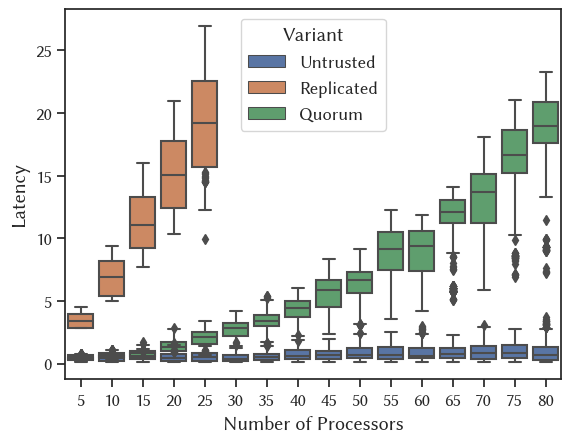

In [62]:
# plt.figure(figsize=(12, 3))
sns.boxplot(data=data[data["Mode"] == "All"],
    x="Number of Processors", y="Latency", hue="Variant", 
    hue_order=["Untrusted", "Replicated", "Quorum"], dodge=False)

/tmp/ipykernel_467870/317690673.py:1: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  f = sns.lineplot(data=data[data["Mode"] == "One"],


[(0.0, 2.0)]

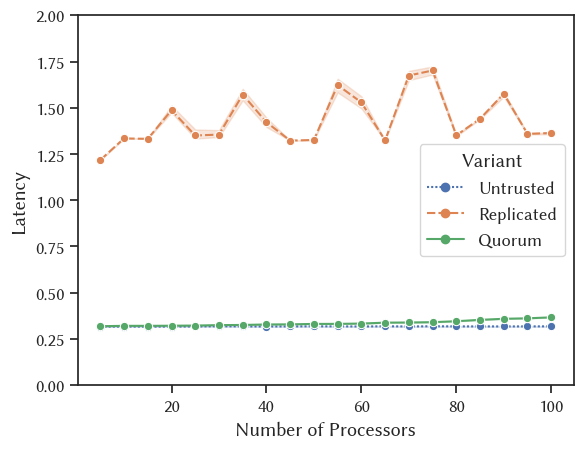

In [63]:
f = sns.lineplot(data=data[data["Mode"] == "One"],
    x="Number of Processors", y="Latency", hue="Variant", 
    hue_order=["Untrusted", "Replicated", "Quorum"],
    style="Variant", markers=["o"])
f.set(ylim=(0, 2.0))